In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
us_prices_df = pd.read_csv("ETL_Dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
DATE,,,,,,,,,,,,,
2004-01-01,141.647,52179.000000,187567500.0,3.8,186.3,5.7,71.26121,150.0,1.00,79.757,112000.0,65760.0,27.201
2004-02-01,143.192,52275.666667,187830600.0,3.7,186.7,5.6,71.20414,153.4,1.01,79.757,112000.0,65760.0,27.201
2004-03-01,145.058,52372.333333,188108000.0,3.6,187.1,5.8,71.04634,156.5,1.00,79.757,112000.0,65760.0,27.201
2004-04-01,146.592,52469.000000,188336800.0,4.0,187.4,5.6,71.19504,160.1,1.00,79.757,112000.0,65760.0,27.201
2004-05-01,148.186,52591.000000,188539500.0,3.8,188.2,5.6,71.14265,162.7,1.00,79.757,112000.0,65760.0,27.201


In [7]:
us_prices_df.drop(columns = ["Year", "Month"], inplace = True)

**Exploratory Data Analysis**


In [9]:
summary_stats = us_prices_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
count,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,183.116000,57706.078947,2.008464e+08,6.255263,232.445329,6.011404,69.408665,216.311632,1.310789,81.349526,121874.263158,69085.789474,35.137842
std,40.828751,3821.717454,5.509345e+06,1.931815,26.017227,2.089485,2.068878,43.017225,1.618934,1.008017,5806.601889,4638.176745,5.807508
min,136.531000,52179.000000,1.875675e+08,3.300000,186.300000,3.500000,60.171120,150.000000,0.050000,79.757000,112000.000000,63350.000000,27.201000
25%,151.464000,54599.750000,1.969411e+08,4.975000,213.374250,4.500000,67.489205,189.275000,0.117500,80.438000,116783.000000,65740.000000,29.876000
50%,174.614500,56212.333333,2.023046e+08,5.600000,232.918500,5.350000,69.675185,209.200000,0.375000,81.299000,122459.000000,67520.000000,33.806000
75%,200.139750,60715.666667,2.056487e+08,7.300000,249.739500,7.525000,71.262653,231.525000,2.062500,82.256000,127586.000000,73030.000000,38.859000
max,304.468000,65997.000000,2.075878e+08,12.200000,298.812000,14.800000,72.315600,353.015000,5.260000,83.084000,131202.000000,78250.000000,48.021000


In [10]:
corr_matrix = us_prices_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Construction_Material,FEDFUNDS,Urban_US_Percentage,Num_Households,median_income,Subsidy
CSUSHPISA,1.000000,0.889292,0.525305,0.054685,0.788705,-0.526177,0.365367,0.881160,0.133692,0.744169,0.695859,0.832737,0.815287
Per_Capita_GDP,0.889292,1.000000,0.808710,-0.106377,0.931007,-0.504973,0.192169,0.896356,-0.107773,0.934177,0.918179,0.873051,0.911444
working_age_pop,0.525305,0.808710,1.000000,-0.072854,0.910688,-0.128689,-0.273045,0.737095,-0.458090,0.938033,0.962138,0.606068,0.845555
Houses,0.054685,-0.106377,-0.072854,1.000000,-0.014464,0.064637,0.127357,0.084359,0.227703,-0.131480,-0.145034,-0.107461,-0.040354
CPI,0.788705,0.931007,0.910688,-0.014464,1.000000,-0.243317,-0.094736,0.937251,-0.342957,0.975976,0.965736,0.722740,0.963779
UNRATE,-0.526177,-0.504973,-0.128689,0.064637,-0.243317,1.000000,-0.886445,-0.289238,-0.513563,-0.240928,-0.260435,-0.505636,-0.168167
Emp_Rate,0.365367,0.192169,-0.273045,0.127357,-0.094736,-0.886445,1.000000,0.035063,0.738692,-0.123099,-0.127909,0.316419,-0.120414
Construction_Material,0.881160,0.896356,0.737095,0.084359,0.937251,-0.289238,0.035063,1.000000,-0.244405,0.871703,0.839153,0.675462,0.920305
FEDFUNDS,0.133692,-0.107773,-0.458090,0.227703,-0.342957,-0.513563,0.738692,-0.244405,1.000000,-0.383746,-0.387043,0.086956,-0.348070
Urban_US_Percentage,0.744169,0.934177,0.938033,-0.131480,0.975976,-0.240928,-0.123099,0.871703,-0.383746,1.000000,0.992799,0.781383,0.960650


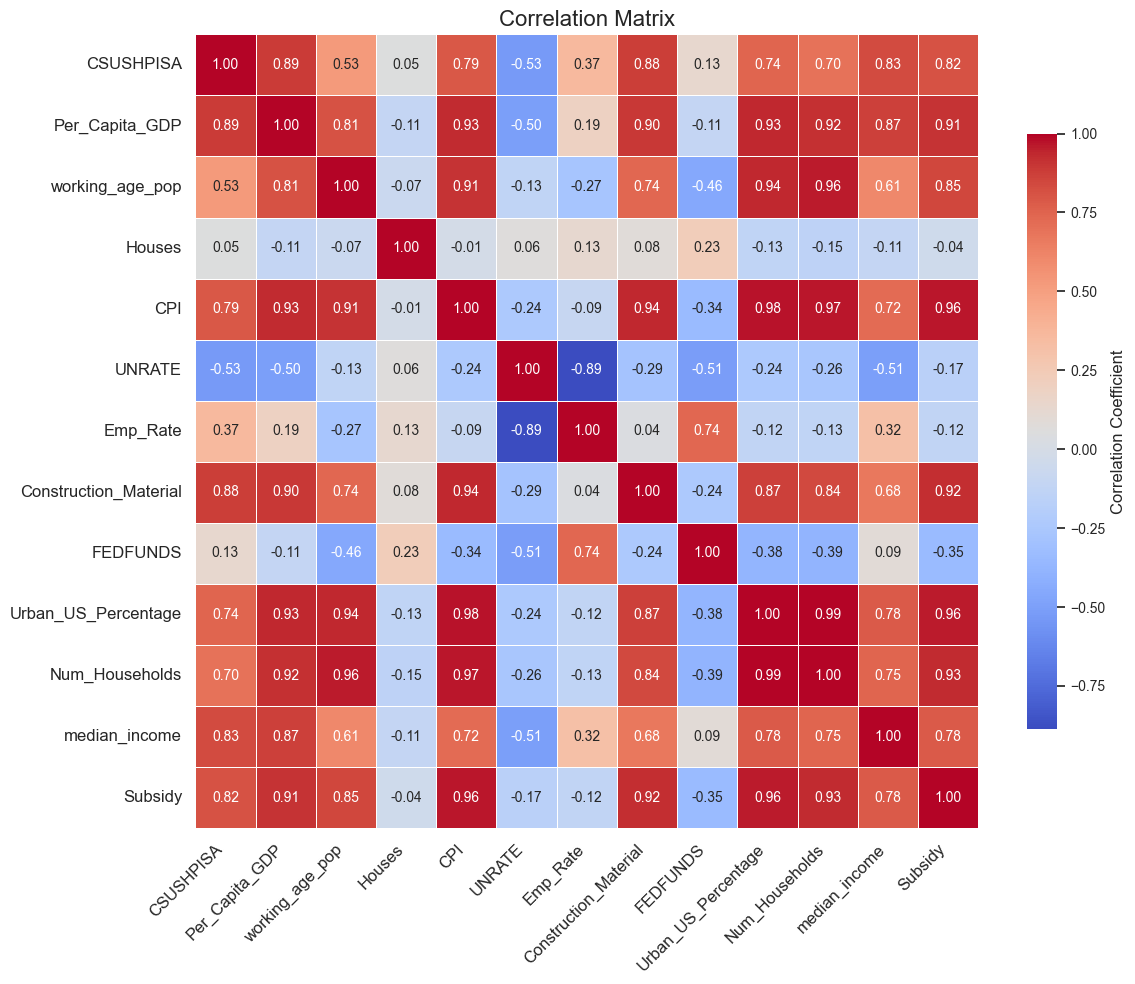

In [12]:
plt.figure(figsize=(12, 10))  
sns.set(style='whitegrid') 


heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'shrink': 0.75}, 
    annot_kws={"size": 10}  
)


plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(rotation=0, fontsize=12)  


cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', fontsize=12)
cbar.ax.tick_params(labelsize=10)


plt.tight_layout()  
plt.show()


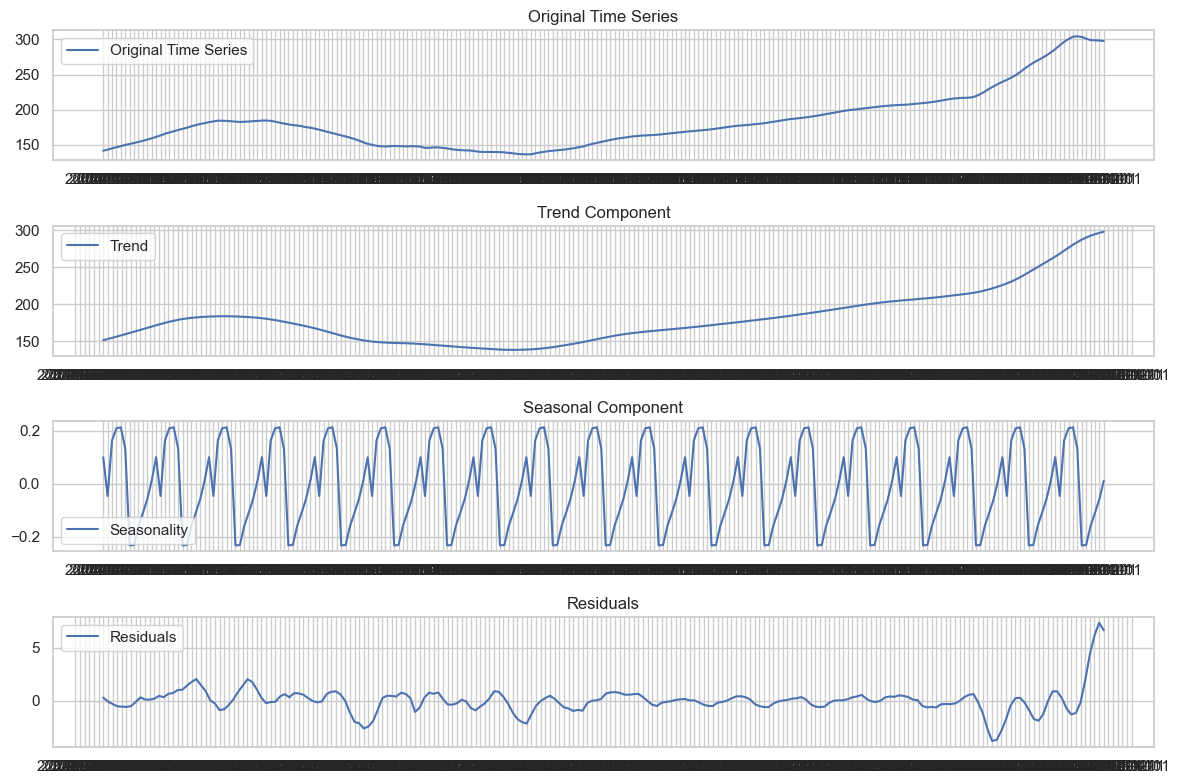

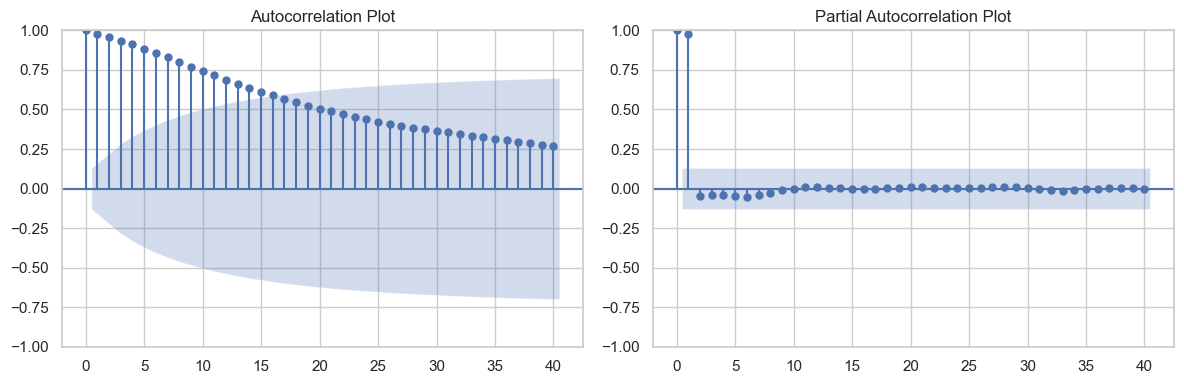

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_prices_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_prices_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_prices_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

In [15]:
us_prices_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'Emp_Rate', 'Construction_Material', 'FEDFUNDS',
       'Urban_US_Percentage', 'Num_Households', 'median_income', 'Subsidy'],
      dtype='object')

In [16]:
variables_facts = ['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'UNRATE', 'Emp_Rate', 'Construction_Material', 'FEDFUNDS',
       'Urban_US_Percentage', 'Num_Households', 'median_income', 'Subsidy']

<Figure size 1300x800 with 0 Axes>

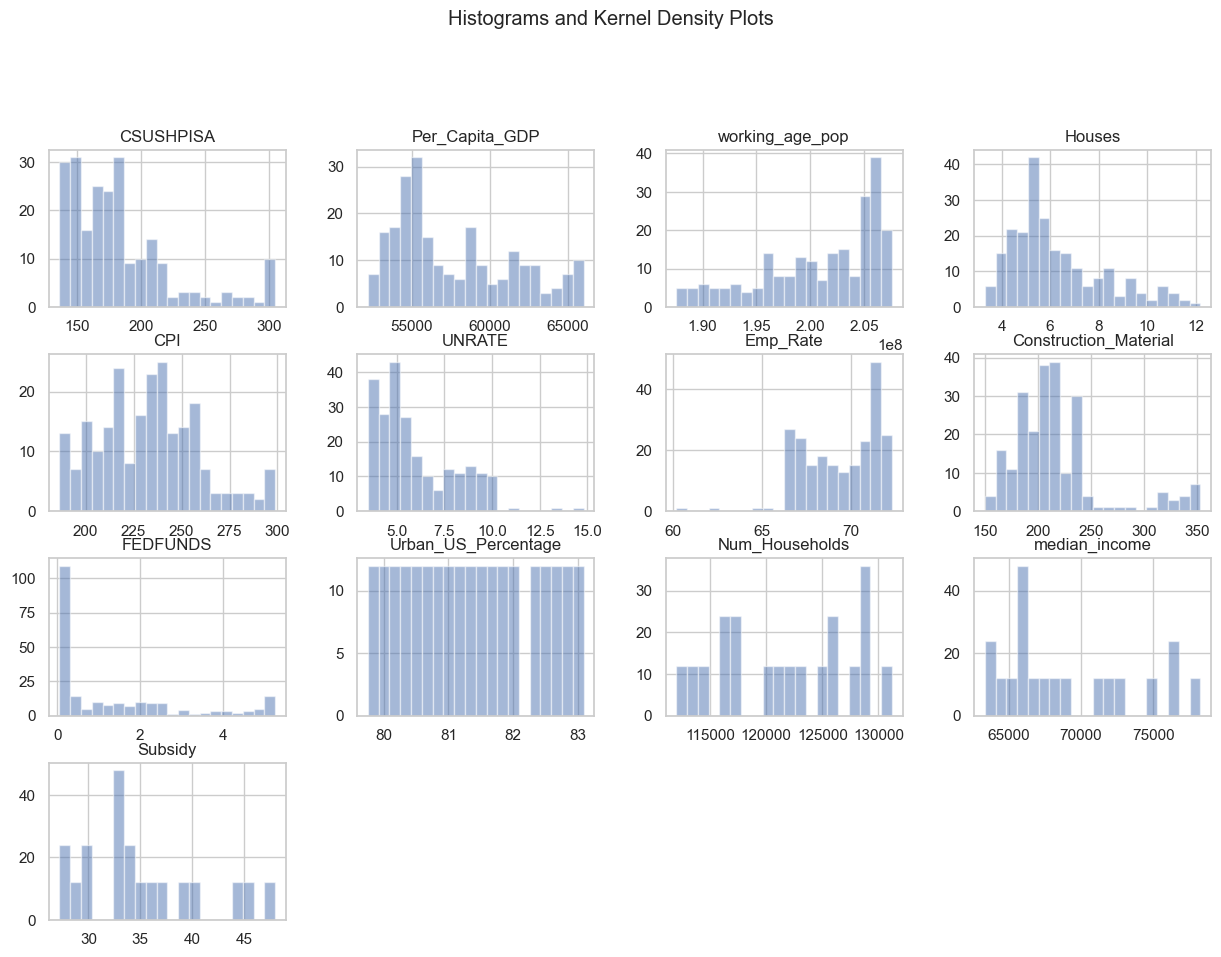

In [19]:

plt.figure(figsize=(13, 8))
us_prices_df[variables_facts].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [20]:
y = us_prices_df.pop("CSUSHPISA")
X = us_prices_df 

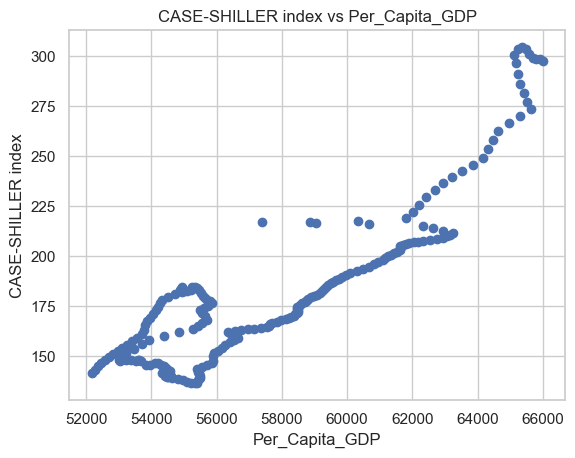

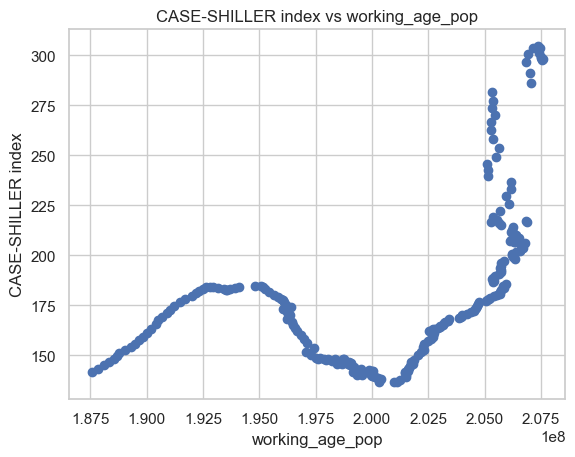

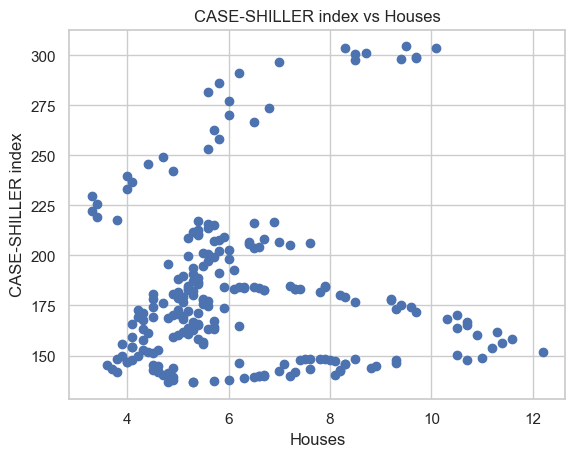

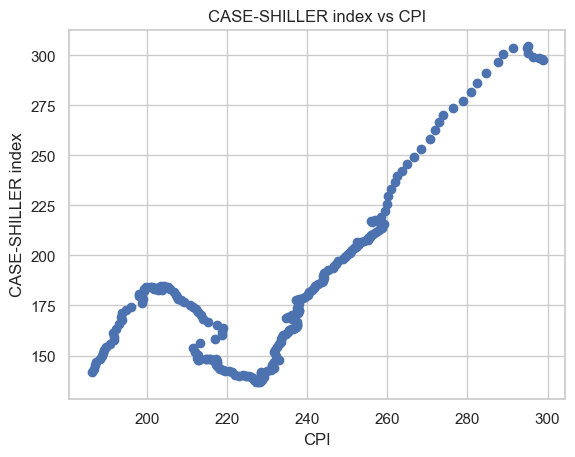

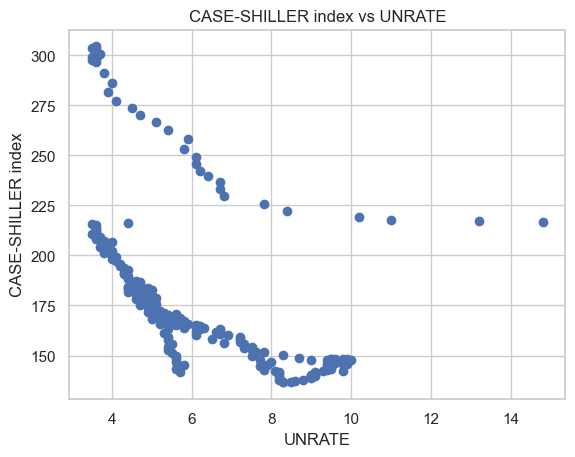

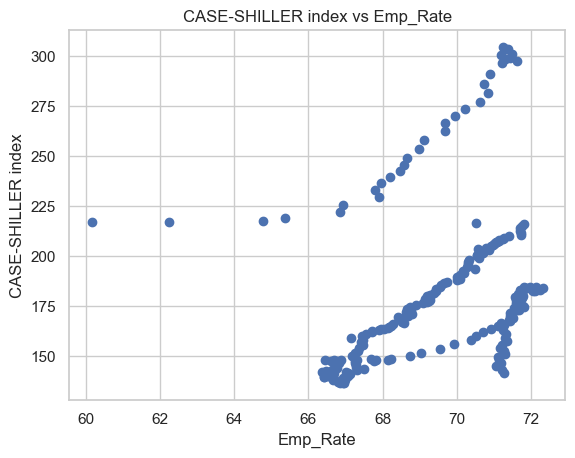

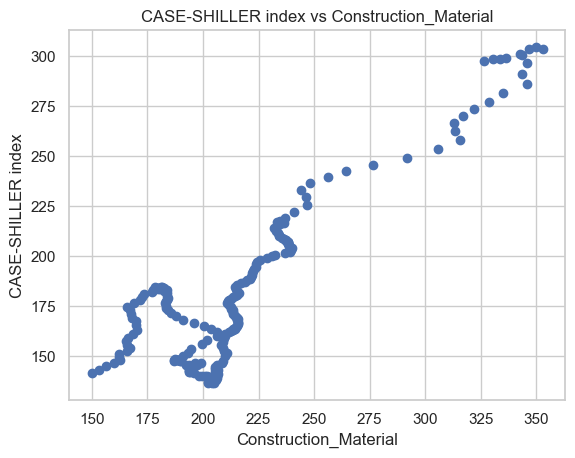

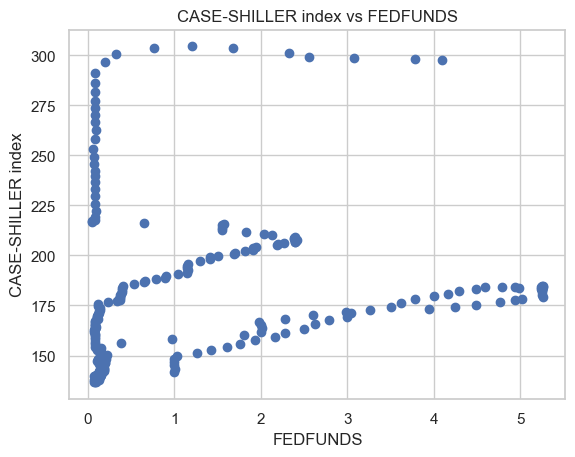

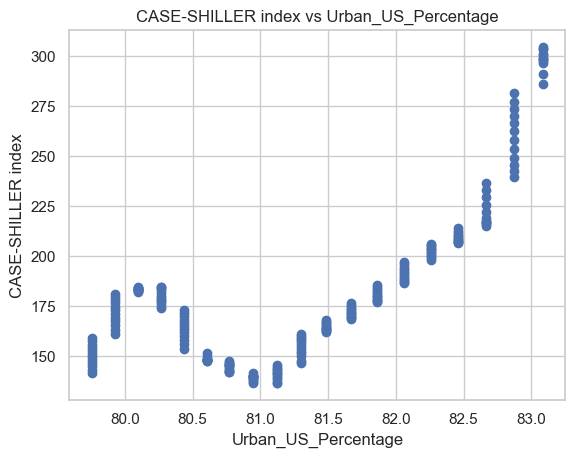

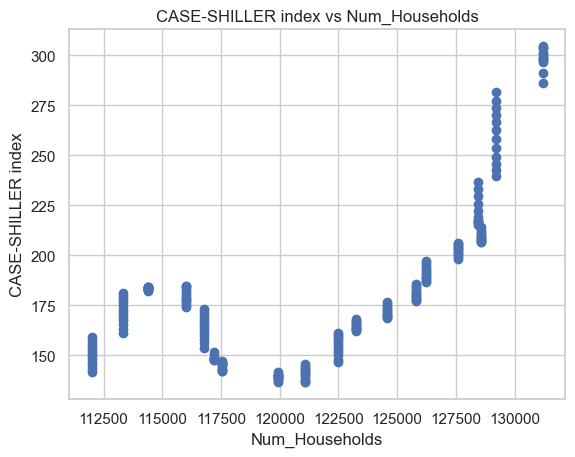

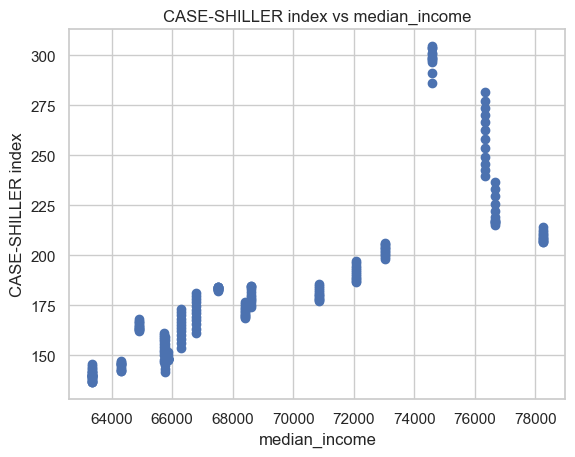

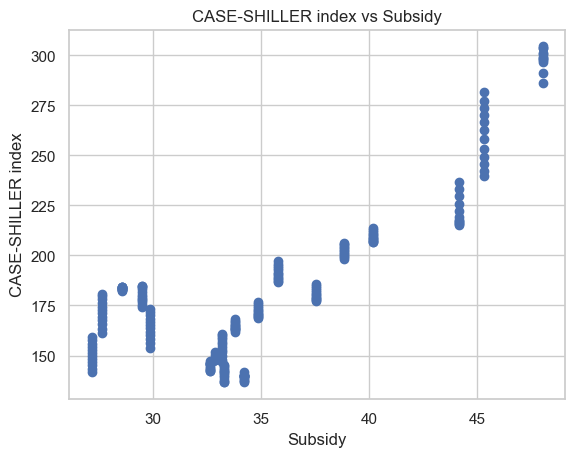

In [21]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [22]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))


sorted_correlations = correlations.sort_values()

print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Houses                   0.054685
FEDFUNDS                 0.133692
Emp_Rate                 0.365367
working_age_pop          0.525305
UNRATE                   0.526177
Num_Households           0.695859
Urban_US_Percentage      0.744169
CPI                      0.788705
Subsidy                  0.815287
median_income            0.832737
Construction_Material    0.881160
Per_Capita_GDP           0.889292
dtype: float64
